In [1]:
import geopandas as gpd
import fiona

In [5]:
buildings = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Prague/Clustering/geometry.gpkg', layer='buildings')

In [6]:
buildings['geometry'] = buildings.geometry.centroid

In [2]:
path = '/Users/martin/Dropbox/Academia/Contracts/UAP Prague/2020.01_Zakázka MF/01_data/20200107_Zakazka MF_validacni data.gdb'

In [3]:
fiona.listlayers(path)

['URK_PrstenceStav_p',
 'URK_SS_VyuzitiKody_t',
 'URK_SS_VyuzitiZakl_p',
 'URK_SS_VyuzitiZaklB_p',
 'VyvojZastavby_p']

In [4]:
vyvoj = gpd.read_file(path, layer='VyvojZastavby_p')

In [9]:
vyvoj = vyvoj.to_crs(buildings.crs)

/Users/martin/anaconda3/envs/geo_dev/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [10]:
joined = gpd.sjoin(buildings, vyvoj, how='left')

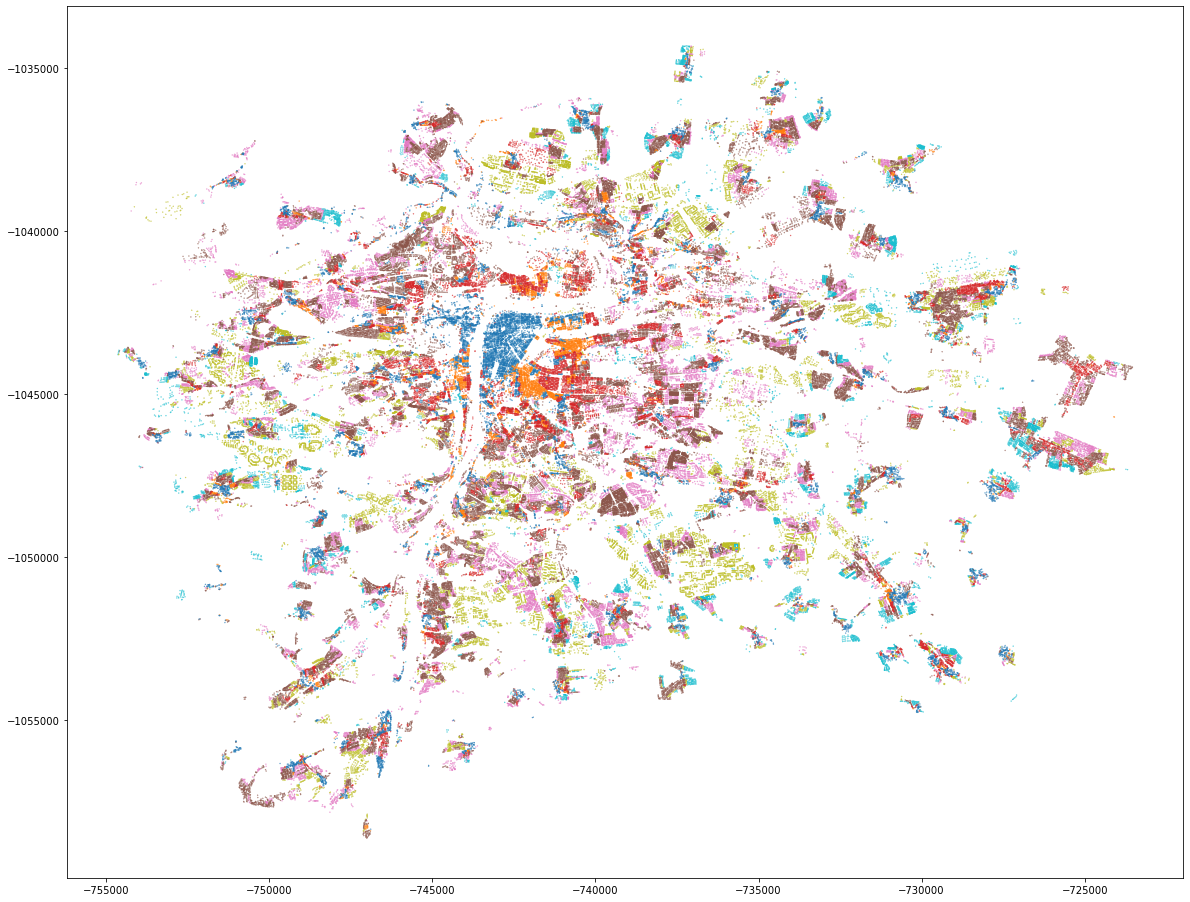

In [13]:
joined.plot('ROK_PUVODNI', categorical=True, figsize=(20, 20), s=0.1)

In [14]:
joined.columns

Index(['uID', 'geometry', 'index_right', 'FID_Zastavba_1840', 'KOD',
       'FID_Zastavba_1920', 'KOD_1', 'FID_Zastavba_1950', 'KOD_12',
       'FID_Zastavba_1970', 'KOD_12_13', 'FID_Zastavba_1990', 'KOD_12_13_14',
       'FID_URK_StrukturaUzemi_p_1207', 'VYSKA', 'KOD_12_13_14_15',
       'FID_Zastavba_1880', 'KOD_12_13_14_15_16', 'ROK_PUVODNI', 'KOD_PUVODNI',
       'POZNAMKA', 'ROK_SOUCASNY', 'KOD_SOUCASNY', 'Shape_Length',
       'Shape_Area'],
      dtype='object')

In [15]:
joined.drop(columns=['geometry', 'index_right', 'Shape_Length', 'Shape_Area']).to_csv(
    '/Users/martin/Dropbox/Academia/Data/Geo/Prague/Validation/origin_year.csv')

In [16]:
landuse = gpd.read_file(path, layer='URK_SS_VyuzitiZaklB_p')

In [17]:
landuse = landuse.to_crs(buildings.crs)

/Users/martin/anaconda3/envs/geo_dev/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [18]:
joined2 = gpd.sjoin(buildings, landuse, how='left')

In [6]:
joined2.plot('KOD', categorical=True, figsize=(20, 20), s=0.1, legend=True)

NameError: name 'joined2' is not defined

In [21]:
joined2.columns

Index(['uID', 'geometry', 'index_right', 'ZASTUPNA_FUNKCE', 'ZA_PRAHOU',
       'CELKY_NAZEV', 'KOD', 'KOD_POLYFCE', 'BUDOVA', 'ID_POSKYT', 'POSKYT',
       'GLOBALID', 'TID_URK_SS_VYUZITIZAKLB_P', 'VEREJ_PRISTUP',
       'SHAPE_Length', 'SHAPE_Area'],
      dtype='object')

In [22]:
joined2.drop(columns=['geometry', 'index_right', 'SHAPE_Length', 'SHAPE_Area']).to_csv(
    '/Users/martin/Dropbox/Academia/Data/Geo/Prague/Validation/land_use.csv')